In [236]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import keras
import pickle
import os

In [147]:
label_encoder = dict()
label_decoder = dict()
label_counter = 0
with open('Datasets/TestImages_prepared.txt', 'r') as f:
    test_file_names=f.read().split('\n')
with open('Datasets/TrainImages_prepared.txt', 'r') as f:
    training_file_names=f.read().split('\n')
for i in training_file_names:
    label = i.split('/')[0]
    if label not in label_encoder:
        label_encoder[label]=label_counter
        label_decoder[label_counter] = label
        label_counter+=1

In [234]:
with open('Serialized/label_encoder.obj', 'bw') as f:
    pickle.dump(label_encoder, f)
with open('Serialized/label_decoder.obj', 'bw') as f:
    pickle.dump(label_decoder, f)

In [169]:
PATH = 'Datasets/indoorCVPR_09/Images/'
def load_data(file_names):
    counter = 0
    _size = len(file_names)
    X = np.zeros(shape=(_size, 150, 200, 3), dtype='float32')
    y = np.zeros(shape=(_size), dtype='uint8')
    for i in file_names:
        X[counter]=cv2.resize(cv2.imread(PATH+i),(200,150))
        y[counter]=label_encoder[i.split('/')[0]]
        counter+=1
    return X, y

In [172]:
X,y = load_data(training_file_names)
X_test, y_test = load_data(test_file_names)
import pickle
with open('Datasets/train_data/X.obj', 'bw') as f:
    pickle.dump(X, f)
with open('Datasets/train_data/y.obj', 'bw') as f:
    pickle.dump(y, f)
with open('Datasets/test_data/X.obj', 'bw') as f:
    pickle.dump(X_test, f)
with open('Datasets/test_data/y.obj', 'bw') as f:
    pickle.dump(y_test, f)

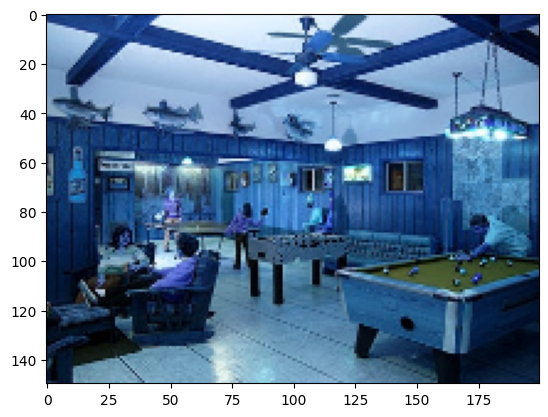

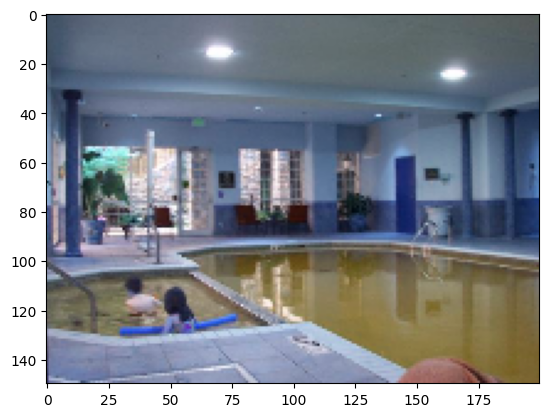

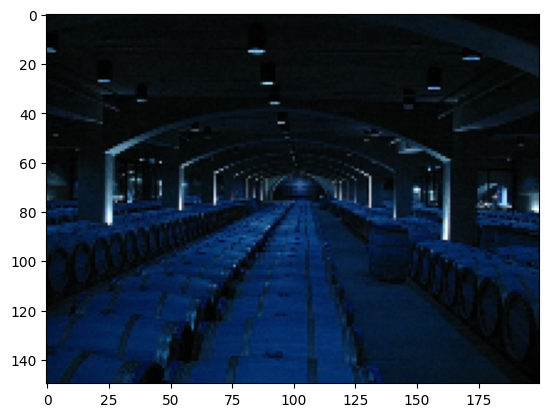

In [86]:
for i in range(3):
    img = X[i]
    img = img.astype('uint8')
    plt.imshow(img)
    plt.show()

In [166]:
"""Model jest już zapisany. Nie trenować."""
model = keras.Sequential(layers=[
    #keras.layers.Resizing(400,500),
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 200, 3)),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(200),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(label_counter)
])
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [168]:
print(model.summary())

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 148, 198, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 74, 99, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_64 (Conv2D)          (None, 72, 97, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 36, 48, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_65 (Conv2D)          (None, 34, 46, 128)       73856     
                                                                 
 flatten_2 (Flatten)         (None, 200192)          

In [173]:
model.fit(X, y, epochs=10)

Epoch 1/10
168/168 [==============================] - 122s 723ms/step - loss: 4.5950 - accuracy: 0.0206
Epoch 2/10
168/168 [==============================] - 113s 675ms/step - loss: 3.9670 - accuracy: 0.0888
Epoch 3/10
168/168 [==============================] - 115s 683ms/step - loss: 3.4028 - accuracy: 0.2126
Epoch 4/10
168/168 [==============================] - 111s 661ms/step - loss: 2.7900 - accuracy: 0.3734
Epoch 5/10
168/168 [==============================] - 111s 663ms/step - loss: 2.4351 - accuracy: 0.4512
Epoch 6/10
168/168 [==============================] - 111s 661ms/step - loss: 1.9291 - accuracy: 0.5675
Epoch 7/10
168/168 [==============================] - 111s 659ms/step - loss: 1.7121 - accuracy: 0.6202
Epoch 8/10
168/168 [==============================] - 111s 661ms/step - loss: 1.3715 - accuracy: 0.6939
Epoch 9/10
168/168 [==============================] - 112s 668ms/step - loss: 1.0590 - accuracy: 0.7648
Epoch 10/10
168/168 [==============================] - 126s 751m

In [205]:
#model.save('SavedModels')

INFO:tensorflow:Assets written to: SavedModels\assets


INFO:tensorflow:Assets written to: SavedModels\assets


In [ ]:
model = keras.models.load_model('SavedModels')

In [208]:
predicted = model.predict(X_test)
predicted = [np.argmax(i) for i in predicted]
counter = 0
for i in range(len(y_test)):
    if y_test[i] == predicted[i]:
        counter+=1

print(counter/len(y_test))

42/42 [==============================] - 4s 98ms/step
0.8545727136431784


1/1 [==============================] - 0s 41ms/step


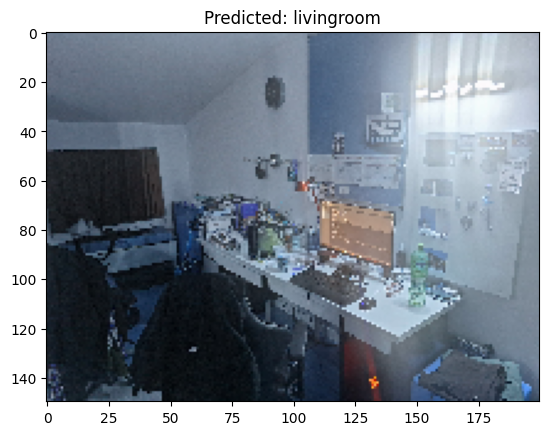

1/1 [==============================] - 0s 31ms/step


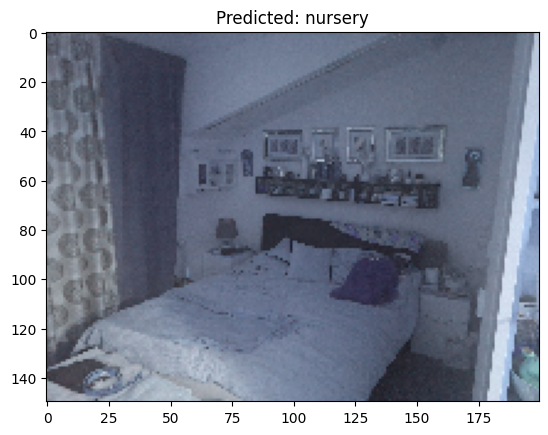

1/1 [==============================] - 0s 31ms/step


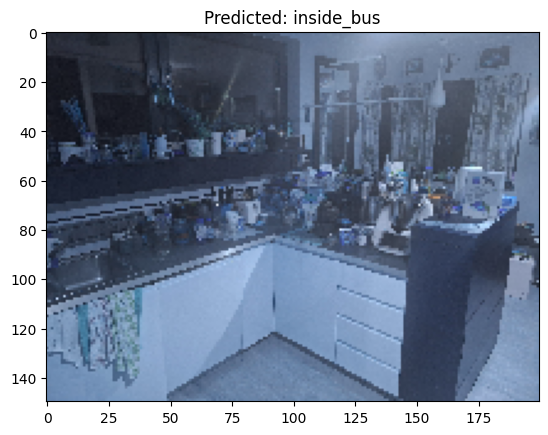

1/1 [==============================] - 0s 33ms/step


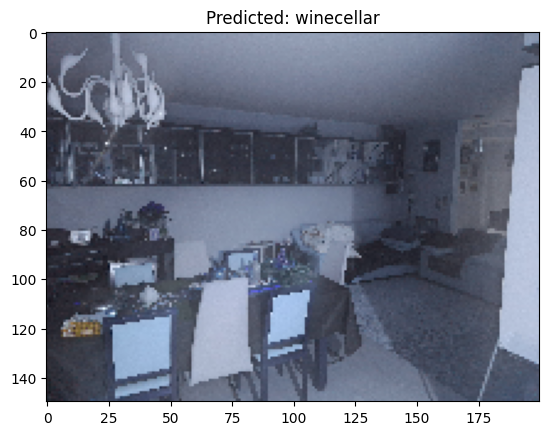

1/1 [==============================] - 0s 29ms/step


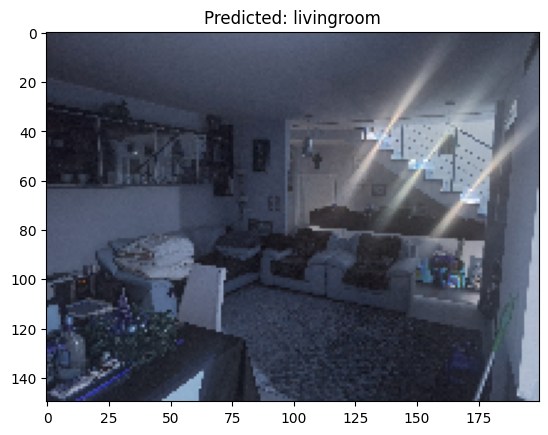

1/1 [==============================] - 0s 43ms/step


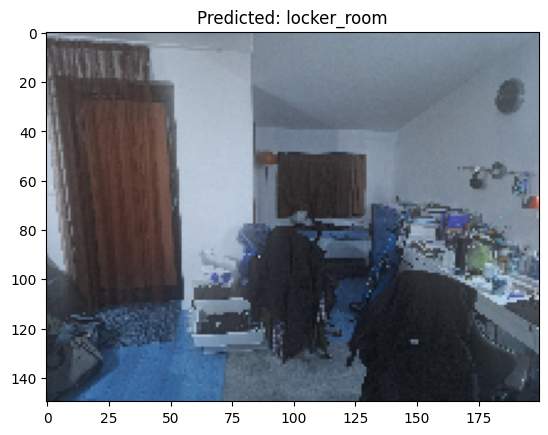

1/1 [==============================] - 0s 35ms/step


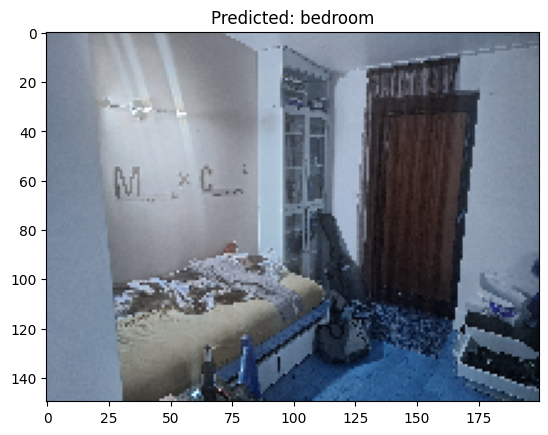

1/1 [==============================] - 0s 34ms/step


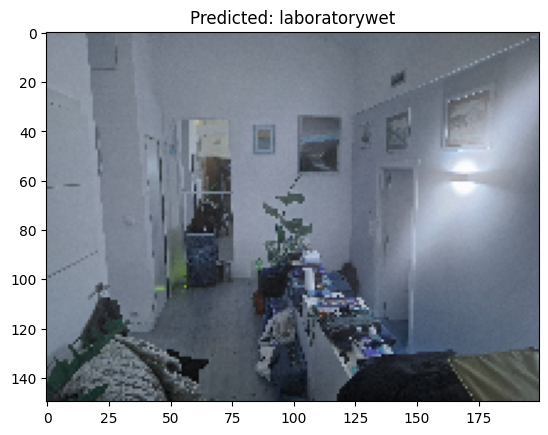

1/1 [==============================] - 0s 35ms/step


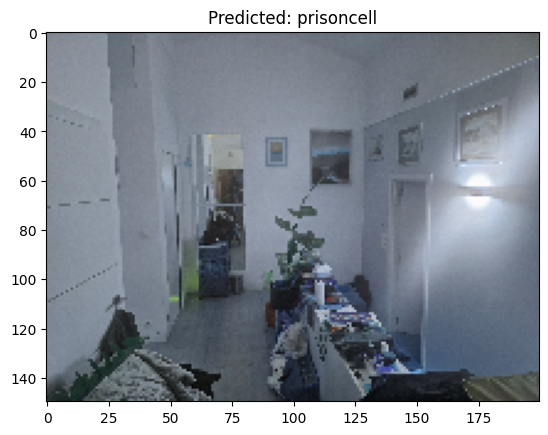

1/1 [==============================] - 0s 39ms/step


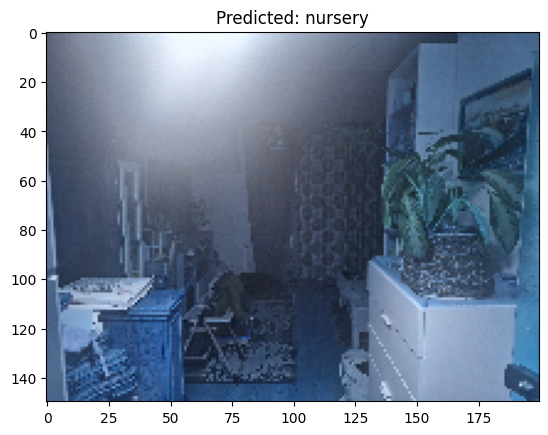

1/1 [==============================] - 0s 37ms/step


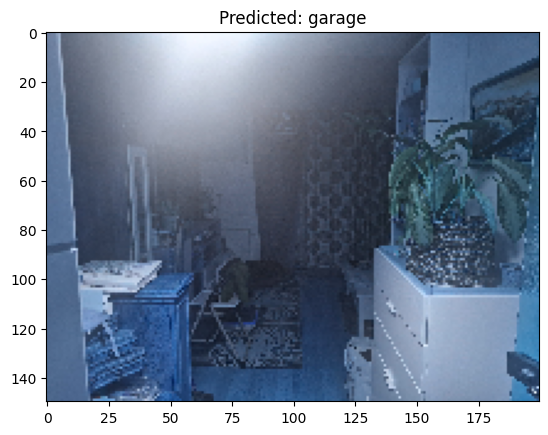

1/1 [==============================] - 0s 35ms/step


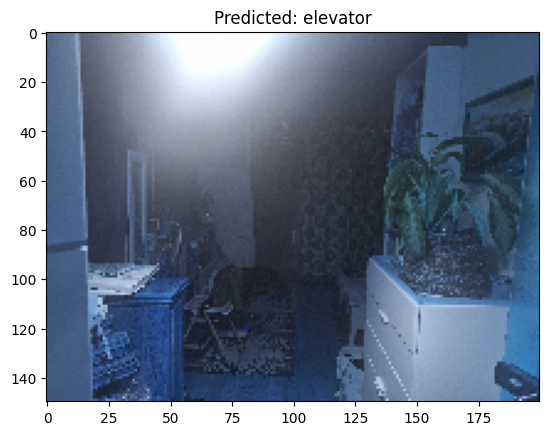

1/1 [==============================] - 0s 33ms/step


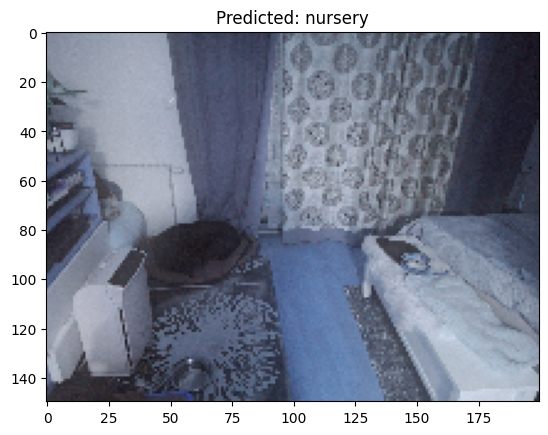

In [243]:
MY_PHOTO_PATH = 'Datasets/MyPhotos/'
for i in os.listdir(MY_PHOTO_PATH):
    img = cv2.imread(MY_PHOTO_PATH + i)
    img = cv2.resize(img, (200, 150))
    my_room = model.predict(np.array([img]))
    plt.imshow(img.astype('uint8'))
    plt.title('Predicted: '+label_decoder[np.argmax(my_room)])
    plt.show()
